Step 1 - Data Collection and Preprocessing

In [141]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
data = pd.read_csv("employee_data.csv")
data

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes
...,...,...,...,...,...,...,...,...
95,96,Daniel Allen,29,HR,53000,3,79,No
96,97,Thomas Harris,40,Engineering,91000,13,92,Yes
97,98,Michael Lewis,45,Sales,75000,16,89,No
98,99,Linda Young,50,HR,70000,21,87,Yes


In [143]:
data.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Name              100 non-null    object
 2   Age               100 non-null    int64 
 3   Department        100 non-null    object
 4   Salary            100 non-null    int64 
 5   YearsAtCompany    100 non-null    int64 
 6   PerformanceScore  100 non-null    int64 
 7   Attrition         100 non-null    object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


In [145]:
# remove duplicates
data = data.drop_duplicates()
data

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes
...,...,...,...,...,...,...,...,...
95,96,Daniel Allen,29,HR,53000,3,79,No
96,97,Thomas Harris,40,Engineering,91000,13,92,Yes
97,98,Michael Lewis,45,Sales,75000,16,89,No
98,99,Linda Young,50,HR,70000,21,87,Yes


In [146]:
# handle missio=ng values
data = data.dropna()
data

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes
...,...,...,...,...,...,...,...,...
95,96,Daniel Allen,29,HR,53000,3,79,No
96,97,Thomas Harris,40,Engineering,91000,13,92,Yes
97,98,Michael Lewis,45,Sales,75000,16,89,No
98,99,Linda Young,50,HR,70000,21,87,Yes


In [147]:
# clean data
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].str.strip().str.lower()

In [148]:
# see cleaned data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Name              100 non-null    object
 2   Age               100 non-null    int64 
 3   Department        100 non-null    object
 4   Salary            100 non-null    int64 
 5   YearsAtCompany    100 non-null    int64 
 6   PerformanceScore  100 non-null    int64 
 7   Attrition         100 non-null    object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


In [149]:
data.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,john doe,29,sales,55000,3,80,no
1,2,jane smith,35,hr,60000,7,85,no
2,3,michael brown,40,engineering,80000,10,95,yes
3,4,emily davis,28,marketing,65000,5,78,no
4,5,david johnson,50,sales,75000,20,88,yes


Step 2 - Exploratory Data Analysis (EDA)

In [150]:
# select only numerical value from dataset
num_data = data.select_dtypes(include=[np.number])
num_data

,EmployeeID,Age,Salary,YearsAtCompany,PerformanceScore
0,1,29,55000,3,80
1,2,35,60000,7,85
2,3,40,80000,10,95
3,4,28,65000,5,78
4,5,50,75000,20,88
...,...,...,...,...,...
95,96,29,53000,3,79
96,97,40,91000,13,92
97,98,45,75000,16,89
98,99,50,70000,21,87


In [151]:
# mean
print("mean:","\n",num_data.mean())

mean: 
 EmployeeID             50.50
Age                    36.57
Salary              72820.00
YearsAtCompany         10.80
PerformanceScore       84.94
dtype: float64


In [152]:
#median
print("median\n", num_data.median())

median
 EmployeeID             50.5
Age                    35.0
Salary              72000.0
YearsAtCompany         10.0
PerformanceScore       85.5
dtype: float64


In [153]:
# mode
print("mode\n", num_data.mode().iloc[0])

mode
 EmployeeID              1.0
Age                    29.0
Salary              68000.0
YearsAtCompany          2.0
PerformanceScore       80.0
Name: 0, dtype: float64


In [154]:
# variance
print("variance\n", num_data.var())

variance
 EmployeeID          8.416667e+02
Age                 6.919707e+01
Salary              1.598663e+08
YearsAtCompany      4.046465e+01
PerformanceScore    4.031960e+01
dtype: float64


In [155]:
# standard deviation
print("standard deviation\n", num_data.std().round(3))

standard deviation
 EmployeeID             29.011
Age                     8.318
Salary              12643.823
YearsAtCompany          6.361
PerformanceScore        6.350
dtype: float64


In [156]:
corr = data.select_dtypes(include='number').corr()
corr

,EmployeeID,Age,Salary,YearsAtCompany,PerformanceScore
EmployeeID,1.000000,-0.023041,0.100207,0.021620,0.151666
Age,-0.023041,1.000000,0.281416,0.946127,0.305288
Salary,0.100207,0.281416,1.000000,0.413361,0.874773
YearsAtCompany,0.021620,0.946127,0.413361,1.000000,0.443331
PerformanceScore,0.151666,0.305288,0.874773,0.443331,1.000000


<Axes: title={'center': 'Correlation analysis'}>

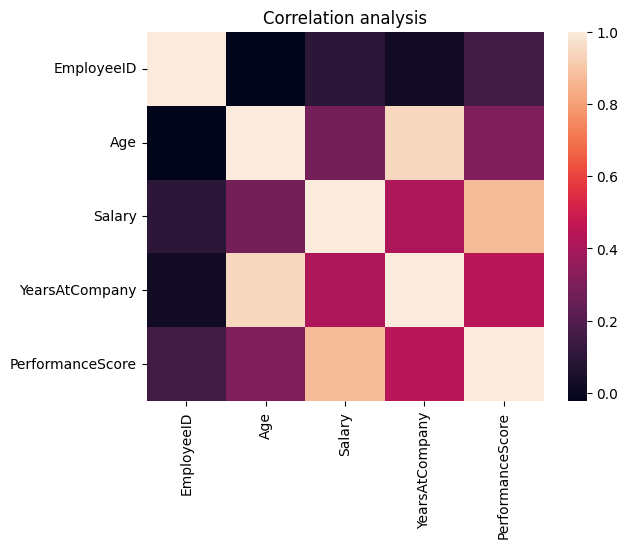

In [157]:
# heatmap
plt.title("Correlation analysis")
sns.heatmap(corr)

In [158]:
data.columns

Index(['EmployeeID', 'Name', 'Age', 'Department', 'Salary', 'YearsAtCompany',
       'PerformanceScore', 'Attrition'],
      dtype='object')

In [159]:
data.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,john doe,29,sales,55000,3,80,no
1,2,jane smith,35,hr,60000,7,85,no
2,3,michael brown,40,engineering,80000,10,95,yes
3,4,emily davis,28,marketing,65000,5,78,no
4,5,david johnson,50,sales,75000,20,88,yes


In [160]:
col_for_plot = ['Age','Department', 'Salary','PerformanceScore']

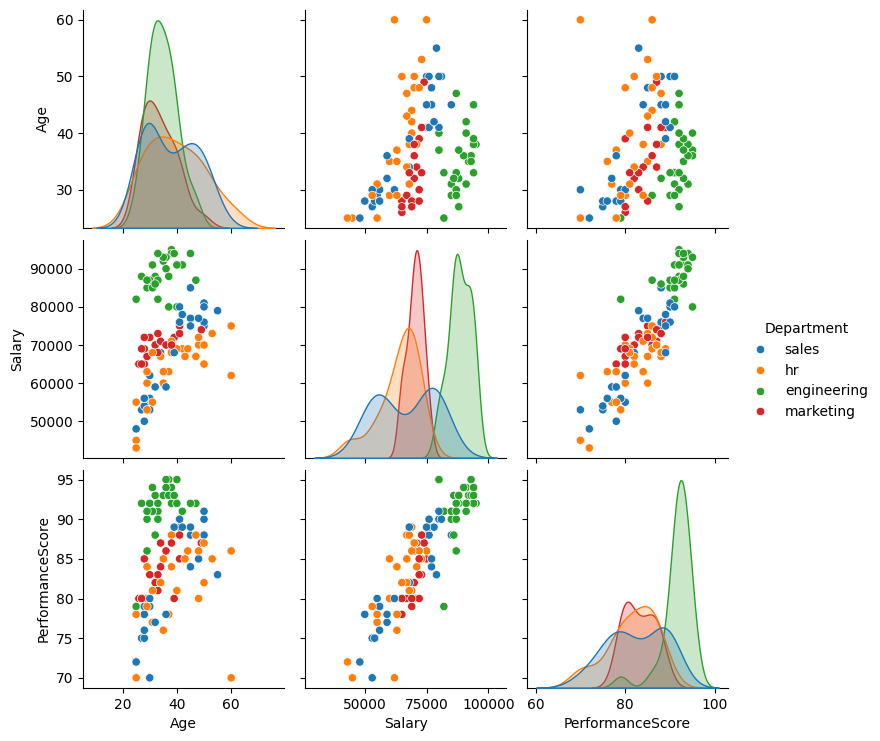

In [161]:
# pairplot
sns.pairplot(data[col_for_plot], hue="Department")

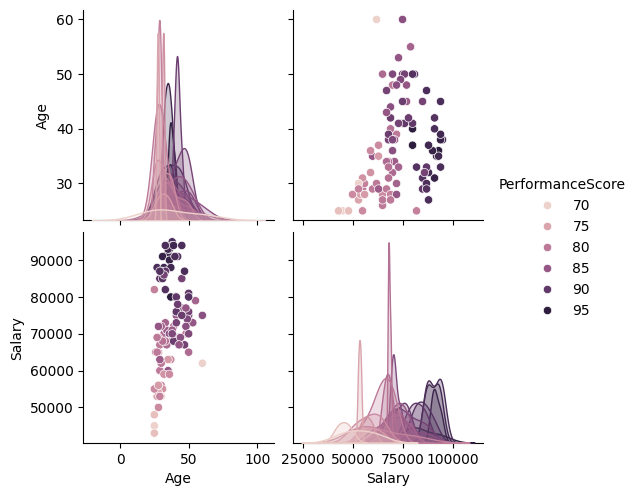

In [162]:
sns.pairplot(data[col_for_plot], hue="PerformanceScore")

<Axes: >

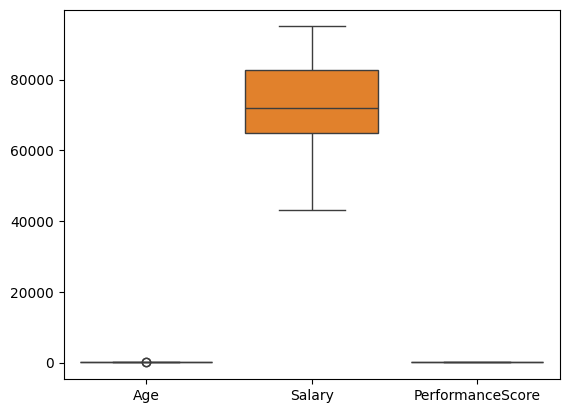

In [163]:
# boxplot
sns.boxplot(data[col_for_plot])

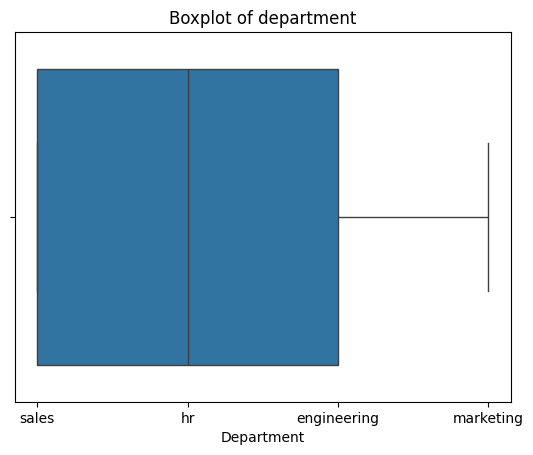

In [164]:
plt.title("Boxplot of department")
sns.boxplot(x=data["Department"])
plt.show()

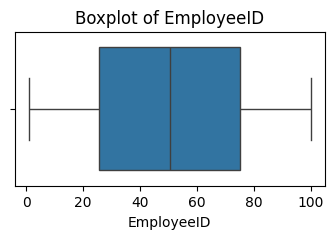

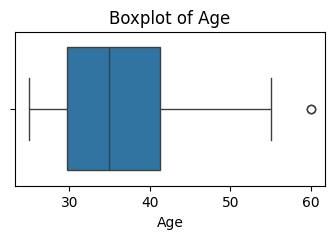

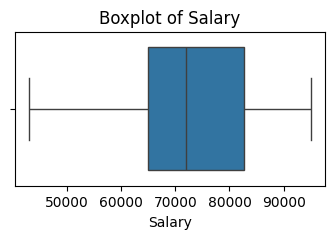

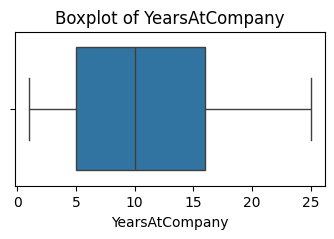

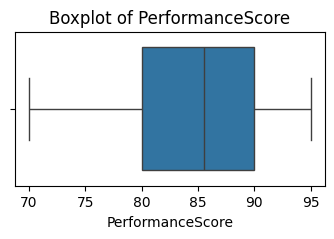

In [165]:
# for multiple data
for col in data.select_dtypes(include='number').columns:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


<Axes: xlabel='Age', ylabel='PerformanceScore'>

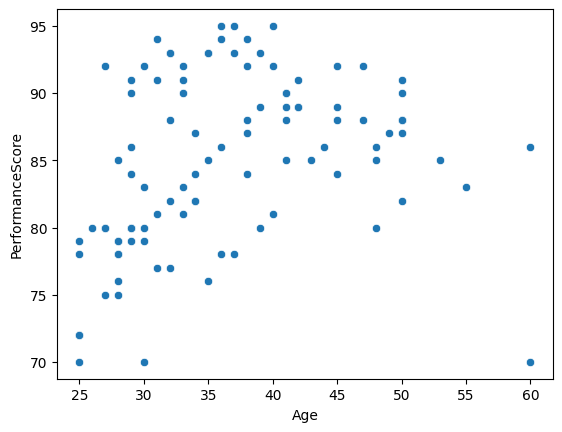

In [166]:
# scatter plot
a = data["Age"]
b = data["PerformanceScore"]
sns.scatterplot(x=a,y=b)

Step 3 - Probability and Statistical Analysis

In [167]:
from scipy import stats

In [168]:
data.shape

(100, 8)

In [169]:
data['Attrition'].value_counts()

,count
Attrition,
no,61
yes,39


In [170]:
data.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,john doe,29,sales,55000,3,80,no
1,2,jane smith,35,hr,60000,7,85,no
2,3,michael brown,40,engineering,80000,10,95,yes
3,4,emily davis,28,marketing,65000,5,78,no
4,5,david johnson,50,sales,75000,20,88,yes


In [171]:
# Probability - Calculate the probability of an employee leaving based on factors like performance scores and department.

# leaving prob
leaving_prob = (data['Attrition']=='Yes').sum()/len(data)
print("leaving probability:", leaving_prob)

leaving probability: 0.0


In [172]:
# prob by department
department_prob = data.groupby('Department')['Attrition'].apply(lambda x: (x == 'Yes').sum() / len(x))
for dept, prob in department_prob.items():
    print(f"{dept}: {prob:.2f}")

engineering: 0.00
hr: 0.00
marketing: 0.00
sales: 0.00


In [173]:
# prob by performance (High: >85, Low: <=85)
prob_high = (data[data['PerformanceScore'] > 85]['Attrition'] == 'Yes').sum() / len(data[data['PerformanceScore'] > 85])
prob_low = (data[data['PerformanceScore'] <= 85]['Attrition'] == 'Yes').sum() / len(data[data['PerformanceScore'] <= 85])

print(f"High Performance (>85): {prob_high:.3f}")
print(f"Low Performance (<=85): {prob_low:.3f}")


High Performance (>85): 0.000
Low Performance (<=85): 0.000


In [174]:
# Bayes theorem
# assume low score
score = 'low'

#p(A)
p_attr = len(data[data['Attrition'] == 'yes']) / len(data)

#p(B)
p_score = len(data[data['PerformanceScore'] == score]) / len(data)

attr_yes_count = len(data[data['Attrition'] == 'yes'])

if attr_yes_count == 0 or p_score == 0:
    print("Cannot compute Bayes' theorem — division by zero.")
else:
    #p(B|A)
    p_s_a = len(data[(data['Attrition'] == 'yes') & (data['PerformanceScore'] == score)]) / attr_yes_count

    # p(A | B=low)
    p_a_s = (p_s_a * p_attr) / p_score





Cannot compute Bayes' theorem — division by zero.


In [175]:
data['Attrition'].unique()

array(['no', 'yes'], dtype=object)

In [176]:
from scipy.stats import f_oneway

# Group performance scores by department
groups = [group['PerformanceScore'].values for name, group in data.groupby("Department")]

# ANOVA test
f_stat, p_val = f_oneway(*groups)

print(f"F-statistic = {f_stat:.3f}, p-value = {p_val:.3f}")

if p_val < 0.05:
    print("Significant difference in performance scores across departments.")
else:
    print(" No significant difference in performance scores across departments.")


F-statistic = 25.781, p-value = 0.000
Significant difference in performance scores across departments.


Phase 2 - Predictive Modeling

In [177]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data[['Salary', 'PerformanceScore']] = ss.fit_transform(data[['Salary', 'PerformanceScore']])
data[['Salary', 'PerformanceScore']]

,Salary,PerformanceScore
0,-1.416484,-0.781900
1,-1.019042,0.009497
2,0.570727,1.592290
3,-0.621600,-1.098459
4,0.173285,0.484335
...,...,...
95,-1.575461,-0.940179
96,1.445100,1.117452
97,0.173285,0.642614
98,-0.224157,0.326056


In [178]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
data[['Salary', 'PerformanceScore']] = mm.fit_transform(data[['Salary', 'PerformanceScore']])
data[['Salary', 'PerformanceScore']]


,Salary,PerformanceScore
0,0.230769,0.40
1,0.326923,0.60
2,0.711538,1.00
3,0.423077,0.32
4,0.615385,0.72
...,...,...
95,0.192308,0.36
96,0.923077,0.88
97,0.615385,0.76
98,0.519231,0.68


In [179]:
# label encoding

from sklearn.preprocessing import LabelEncoder

le_col = ['Attrition', 'Department']
le = LabelEncoder()

for col in le_col:
    data[col] = le.fit_transform(data[col])
    print(data[col].head())  # print result


0    0
1    0
2    1
3    0
4    1
Name: Attrition, dtype: int64
0    3
1    1
2    0
3    2
4    3
Name: Department, dtype: int64


In [180]:
# Employee Attrition Prediction Model

In [181]:
# split model
from sklearn.model_selection import train_test_split

data_encoded = pd.get_dummies(data, drop_first=True)

X = data_encoded.drop('Attrition', axis=1)
y = data_encoded['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [182]:
data.shape

(100, 8)

In [183]:
X_test.shape

(20, 103)

In [184]:
X_train.shape

(80, 103)

In [185]:
y_test.shape

(20,)

In [186]:
y_train.shape

(80,)

In [187]:
X_train.dtypes

,0
EmployeeID,int64
Age,int64
Department,int64
Salary,float64
YearsAtCompany,int64
...,...
Name_thomas harris,bool
Name_thomas scott,bool
Name_timothy turner,bool
Name_william mitchell,bool


In [188]:
from sklearn.linear_model import LogisticRegression

y_train = (y_train > 0.5).astype(int)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [189]:
#import library
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

# evaluation
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Accuracy:  0.6
Precision: 0.42857142857142855
Recall:  0.42857142857142855
F1 Score:  0.42857142857142855


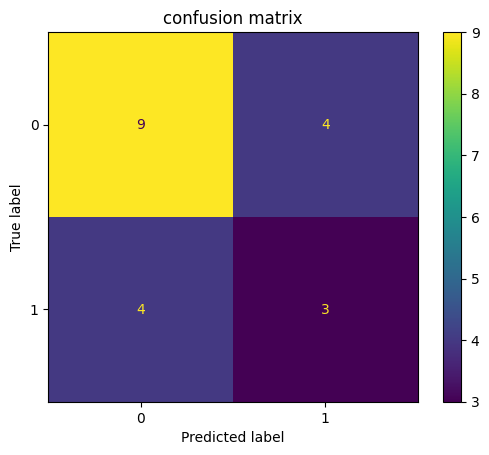

In [190]:
# confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_plot.plot()
plt.title("confusion matrix")
plt.show()

Employee Performance Prediction Model

In [191]:
# library
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [192]:
X = data_encoded.drop('PerformanceScore', axis=1)
y = data_encoded['PerformanceScore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [193]:
# model

lrm = LinearRegression()
lrm.fit(X_train,y_train)

# predict
y_pred = lrm.predict(X_test)
y_pred

array([0.68692912, 0.51513409, 0.2439826 , 0.50600077, 0.51685045,
       0.38894746, 0.48912694, 0.25946438, 0.20168097, 0.45082143,
       0.64448907, 0.62932516, 0.59704878, 0.18995781, 0.58323868,
       0.53245201, 0.1921686 , 0.32063568, 0.45309392, 0.66125014,
       0.8512684 , 0.43050952, 0.43779994, 0.34764053, 0.55817612,
       0.71275545, 0.73642217, 0.78644101, 0.87435841, 0.6226893 ])

In [194]:
# evaluate model

# r- sqr
r = r2_score(y_test, y_pred)
r

0.5689155437605922

In [195]:
# MSE - mean squared error
mse = mean_squared_error(y_test, y_pred)
mse

0.026068922423892794

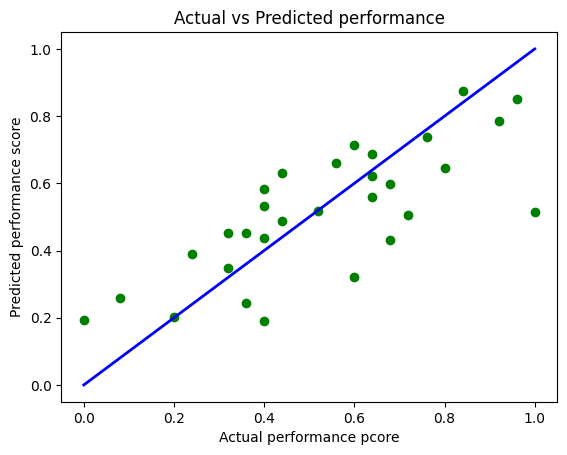

In [196]:
# Visualize predicted vs. actual performance scores
plt.scatter(y_test,y_pred,color='g')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='b', linewidth=2)
plt.xlabel("Actual performance pcore")
plt.ylabel("Predicted performance score")
plt.title("Actual vs Predicted performance")
plt.show()


Deep Learning Models

Deep Learning for Employee Performance Prediction


In [197]:
# library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score


In [198]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [199]:
# Create model
model = Sequential()

# Input layer + first hidden layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Second hidden layer
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1, activation='linear'))

# Compile model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mean_squared_error'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [200]:
# Train
history = model.fit(X_train, y_train, validation_split=0.1, epochs=50, batch_size=16, verbose=1)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 1.3535 - mean_squared_error: 1.3535 - val_loss: 0.6322 - val_mean_squared_error: 0.6322
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6383 - mean_squared_error: 0.6383 - val_loss: 0.4244 - val_mean_squared_error: 0.4244
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3960 - mean_squared_error: 0.3960 - val_loss: 0.3723 - val_mean_squared_error: 0.3723
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3209 - mean_squared_error: 0.3209 - val_loss: 0.3556 - val_mean_squared_error: 0.3556
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2266 - mean_squared_error: 0.2266 - val_loss: 0.3345 - val_mean_squared_error: 0.3345
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1736 - mean_squared_error: 0.1736 - val_loss: 0.3158 - val_mean_squared_error: 0.3158
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1273 - mean_squared_error: 0.1273 - val_loss: 0.3068 - val_mean_squared

In [201]:
# Predict
y_pred = model.predict(X_test).flatten()

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test R² Score: {r2:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Test MSE: 0.0811
Test R² Score: -0.3406


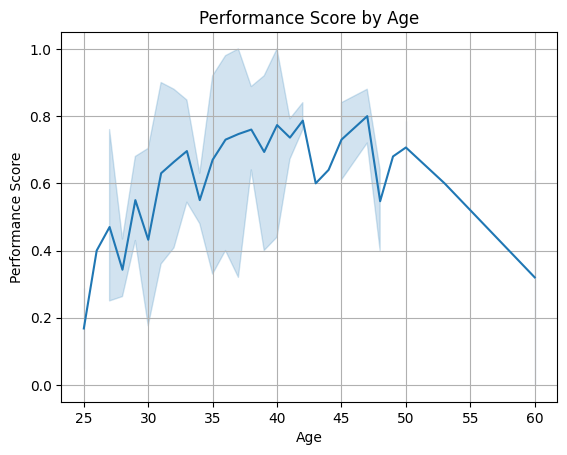

In [202]:
# line plot
sns.lineplot(data=data, x='Age', y='PerformanceScore')
plt.title("Performance Score by Age")
plt.xlabel("Age")
plt.ylabel("Performance Score")
plt.show()


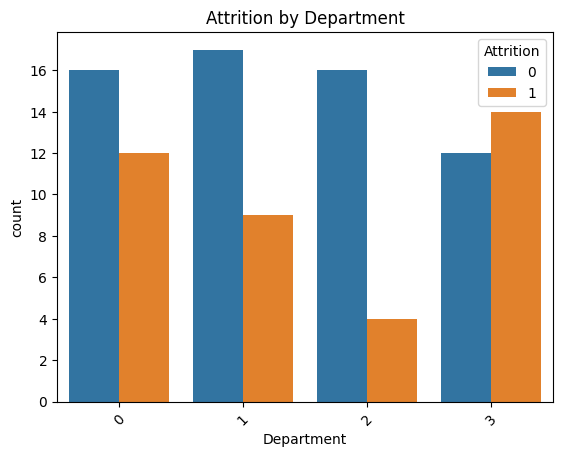

In [204]:
# bar
sns.countplot(data=data, x='Department', hue='Attrition')
plt.title("Attrition by Department")
plt.xticks(rotation=45)
plt.show()


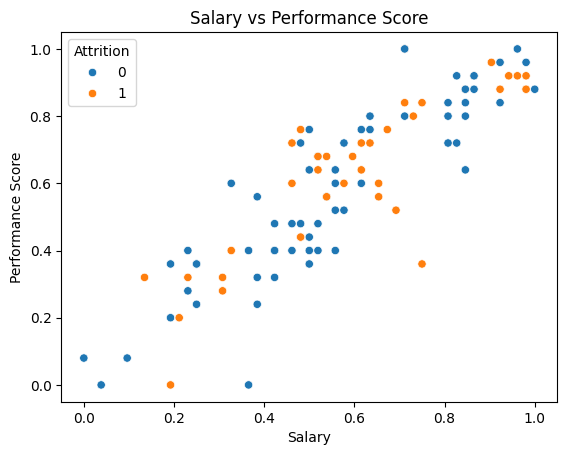

In [203]:
# scatter plot
sns.scatterplot(data=data, x='Salary', y='PerformanceScore', hue='Attrition')
plt.title("Salary vs Performance Score")
plt.xlabel("Salary")
plt.ylabel("Performance Score")
plt.show()
